In [55]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use("ggplot")

%matplotlib inline

In [2]:
folder = "C:/Users/workspace/brad_public_workspace_on_win/non_code_files_brad_public_workspace_on_win/brad_public_workspace_on_win_non_code_files/SH_tongliang/reports/百度流量项目/2_27_2019_PPT_Project/"

In [7]:
perf = pd.read_csv(folder+"3_1_回测权益表现.csv", engine="python")
sz50 = pd.read_csv(folder+"SZ50.csv", engine="python", header=None)

In [10]:
sz50.columns = ['date', 'open', 'high', 'low', 'close', 'volume' ,'turnover']

In [32]:
sz50_close = sz50[['date', 'close']]

In [33]:
perf_equity = perf[['date', 'floating_equity']]

In [37]:
sz50_close['date'] = pd.to_datetime(sz50_close['date'])

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
perf_equity['date'] = pd.to_datetime(perf_equity['date'])

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
perf_equity.head(3)

,date,floating_equity
0,2019-02-27,1310213.82
1,2019-02-26,1303090.21
2,2019-02-25,1318398.27


In [43]:
sz50_close.head(3)

,date,close
0,2019-02-27,2722.309
1,2019-02-26,2729.476
2,2019-02-25,2652.906


In [44]:
sz50_close['date'] = sz50_close['date'].astype(str)

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
perf_equity['date'] = perf_equity['date'].astype(str)

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
merged = perf_equity.merge(sz50_close, on ='date', how = 'inner')

In [58]:
merged['floating_equity_pct'] = merged['floating_equity'].pct_change()
merged['close_pct'] = merged['close'].pct_change()

In [60]:
merged['floating_equity_cum_pct'] = merged['floating_equity_pct'].cumsum()
merged['close_cum_pct'] = merged['close_pct'].cumsum()

In [65]:
merged.index = merged['date']

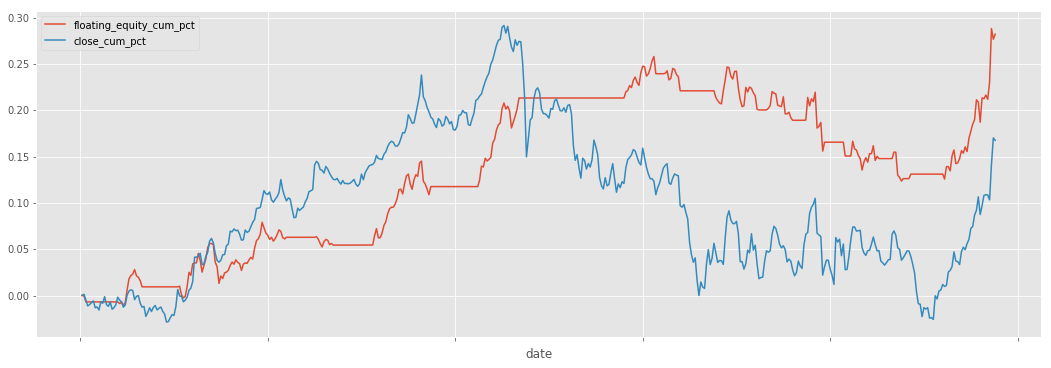

In [66]:
merged[['floating_equity_cum_pct', 'close_cum_pct']].plot(figsize = (18, 6))

In [67]:
merged

,date,floating_equity,close,floating_equity_pct,close_pct,floating_equity_cum_pct,close_cum_pct
date,,,,,,,
2017-02-27,2017-02-27,1000000.00,2365.467,NaN,NaN,NaN,NaN
2017-02-28,2017-02-28,1000000.00,2366.236,0.000000,0.000325,0.000000,0.000325
2017-03-01,2017-03-01,999607.05,2368.622,-0.000393,0.001008,-0.000393,0.001333
2017-03-02,2017-03-02,993124.99,2354.143,-0.006485,-0.006113,-0.006878,-0.004779
2017-03-03,2017-03-03,993124.99,2338.846,0.000000,-0.006498,-0.006878,-0.011277
2017-03-06,2017-03-06,993124.99,2342.518,0.000000,0.001570,-0.006878,-0.009707
2017-03-07,2017-03-07,993124.99,2347.167,0.000000,0.001985,-0.006878,-0.007723
2017-03-08,2017-03-08,993124.99,2351.696,0.000000,0.001930,-0.006878,-0.005793
2017-03-09,2017-03-09,993124.99,2334.336,0.000000,-0.007382,-0.006878,-0.013175


In [50]:
merged.sort_values('date', inplace = True)

In [ ]:
import tushare as ts

ts.get_hist_data('600848') #一次性获取全部日k线数据